In [112]:
import numpy as np
import pandas as pd
import mglearn
from sklearn.tree import DecisionTreeClassifier

#### 데이터 불러오기

In [113]:
dataset=pd.read_csv("18-21데이터통합.csv",encoding='cp949')

#### 변수

In [114]:
print("Keys of iris_dataset:\n", dataset.keys())

Keys of iris_dataset:
 Index(['movie title', ' Daudience ', ' A1audience ', ' A2audience ',
       ' Dscreen ', ' A1screen ', ' A2screen ', ' Nationality ', ' Grade ',
       ' Season ', ' Month ', ' Actscore ', ' social distancing ', ' labels '],
      dtype='object')


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset[[' Daudience ', ' A1audience ', ' Dscreen ', ' A1screen ', ' A2screen ', ' Nationality ', ' Grade ', ' Season ', ' Month ', ' Actscore ', ' social distancing ']], dataset[' labels '], test_size=0.2, random_state=45)

#### 데이터 split

In [116]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (124, 11)
y_train shape: (124,)


In [117]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (124, 11)
y_train shape: (124,)


In [118]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (124, 11)
y_train shape: (124,)


#### 모델 생성

In [119]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [120]:
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

#### 성능 확인

In [121]:
from sklearn.metrics import accuracy_score
print("Accuracy on training set: ", accuracy_score(y_train, y_train_hat))
print("Accuracy on testing set: ", accuracy_score(y_test, y_test_hat))

Accuracy on training set:  1.0
Accuracy on testing set:  0.7419354838709677


#### 최적의 가짓수 확인하기

In [122]:
training_accuracy = []
test_accuracy = []

msl_settings = [2, 3, 4, 5, 6,10,40]
for msl in msl_settings:
    clf = DecisionTreeClassifier(min_samples_leaf= msl, random_state=0)
    clf.fit(X_train, y_train)

    y_train_hat = clf.predict(X_train)
    y_test_hat = clf.predict(X_test)
   
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

In [123]:
result = pd.DataFrame({"min_samples_leaf":msl_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})

In [124]:
result

,min_samples_leaf,training accuracy,test accuracy
0,2,0.919355,0.774194
1,3,0.854839,0.741935
2,4,0.814516,0.774194
3,5,0.790323,0.709677
4,6,0.782258,0.774194
5,10,0.725806,0.806452
6,40,0.459677,0.516129


#### 가지치기를 포함하여 모델 생성

In [125]:
clf = DecisionTreeClassifier(min_samples_leaf= 4, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=0)

[Text(148.0846153846154, 203.85, 'X[1] <= 1068246.0\ngini = 0.77\nsamples = 124\nvalue = [16, 46, 24, 21, 10, 7]'),
 Text(64.38461538461539, 176.67000000000002, 'X[1] <= 561420.0\ngini = 0.541\nsamples = 60\nvalue = [16, 37, 5, 1, 0, 1]'),
 Text(38.63076923076923, 149.49, 'X[4] <= 1099.0\ngini = 0.381\nsamples = 21\nvalue = [16, 4, 1, 0, 0, 0]'),
 Text(25.753846153846155, 122.31, 'X[6] <= 13.5\ngini = 0.208\nsamples = 17\nvalue = [15, 2, 0, 0, 0, 0]'),
 Text(12.876923076923077, 95.13, 'gini = 0.444\nsamples = 6\nvalue = [4, 2, 0, 0, 0, 0]'),
 Text(38.63076923076923, 95.13, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0, 0, 0, 0]'),
 Text(51.50769230769231, 122.31, 'gini = 0.625\nsamples = 4\nvalue = [1, 2, 1, 0, 0, 0]'),
 Text(90.13846153846154, 149.49, 'X[4] <= 724.5\ngini = 0.272\nsamples = 39\nvalue = [0, 33, 4, 1, 0, 1]'),
 Text(77.26153846153846, 122.31, 'gini = 0.0\nsamples = 20\nvalue = [0, 20, 0, 0, 0, 0]'),
 Text(103.01538461538462, 122.31, 'X[9] <= 3.5\ngini = 0.482\nsamples = 

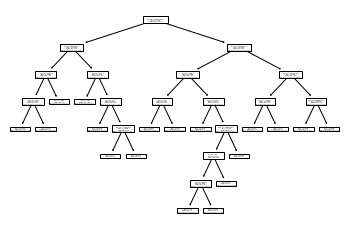

In [126]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(clf)

In [127]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names=['50만 관객','100만 관객','200만 관객','300만 관객','500만 관객','1000만 관객'],
                 impurity=False, filled=True)

#### 시각화

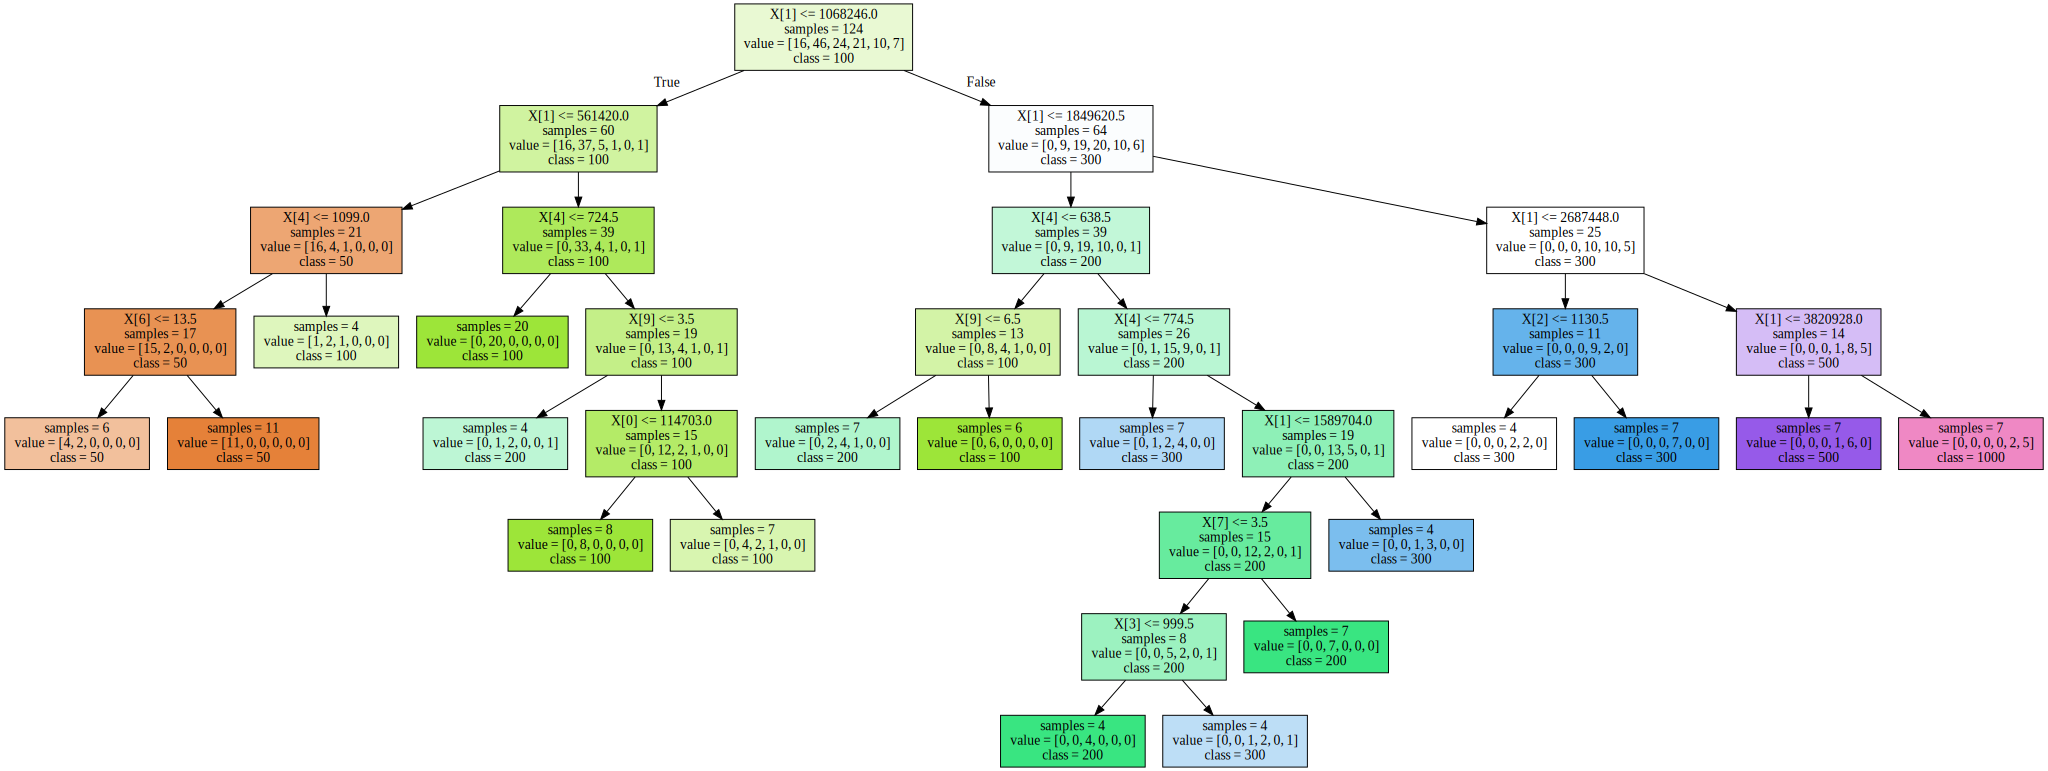

'tree.png'

In [128]:
import graphviz 

with open("tree.dot" ,encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

graphviz.Source(dot_graph).render('tree', format="png")

In [104]:
print("특성 중요도")
print(clf.feature_importances_)

특성 중요도
[0.01635248 0.70675615 0.01951148 0.02682829 0.13795764 0.
 0.01322627 0.01251987 0.         0.06684781 0.        ]


In [105]:
shape=[' Daudience ', ' A1audience ', ' Dscreen ', ' A1screen ', ' A2screen ', ' Nationality ', ' Grade ', ' Season ', ' Month ', ' Actscore ', ' social distancing ']

In [106]:
data=dataset.keys().to_list()

#### 변수의 중요도

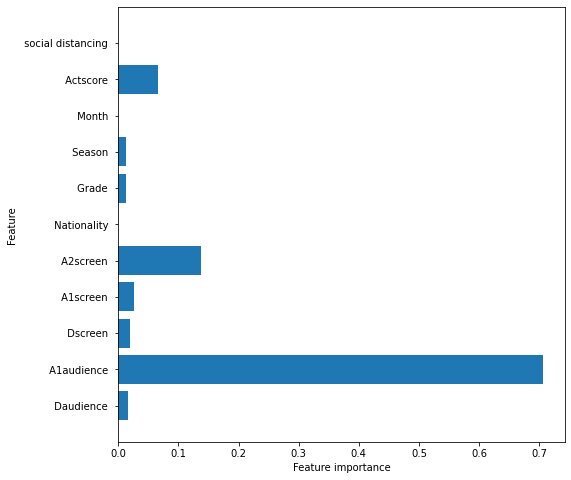

In [107]:
def plot_feature_importances_movie(model):
    n_features = len(shape)
    plt.barh(np.arange(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),shape)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plt.figure(figsize=(8,8))
plot_feature_importances_movie(clf)

Text(0, 0.5, 'A2screen')

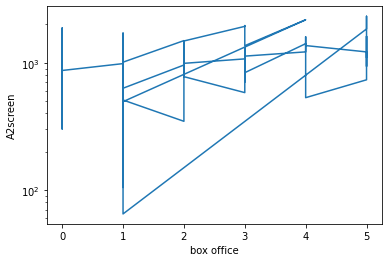

In [108]:
plt.semilogy(dataset[' labels '],dataset[' A2screen '])
plt.xlabel("box office")
plt.ylabel("A2screen")

Text(0, 0.5, 'A1screen')

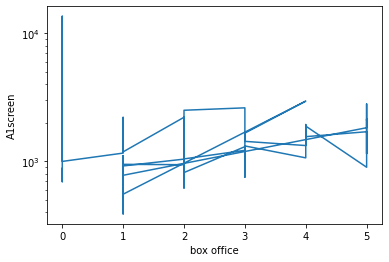

In [109]:
plt.semilogy(dataset[' labels '],dataset[' A1screen '])
plt.xlabel("box office")
plt.ylabel("A1screen")

Text(0, 0.5, 'Actscore')

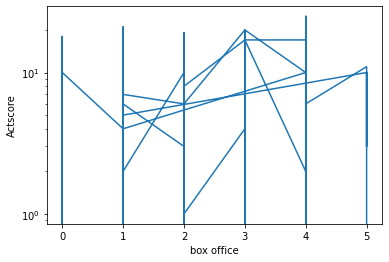

In [110]:
plt.semilogy(dataset[' labels '],dataset[' Actscore '])
plt.xlabel("box office")
plt.ylabel("Actscore")